In [117]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [118]:
df_WRU = pd.read_csv("Data/Word Rank University.csv")

In [119]:
df_THE = pd.read_csv("Data/Times Higher Education.csv")

In [120]:
df_SR = pd.read_csv("Data/shanghai Ranking.csv")

# First data : Word Rank University


### Data profiling

In [121]:
df_WRU.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [122]:
df_WRU.isnull().sum().sort_values(ascending = False)


World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [123]:
df_WRU.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [124]:
df_WRU['Location '].value_counts(),df_WRU['National Rank'].value_counts()

(Location 
 USA                332
 China              314
 Japan              114
 United Kingdom      93
 France              76
                   ... 
 Uruguay              1
 Iceland              1
 Armenia              1
 Luxembourg           1
 North Macedonia      1
 Name: count, Length: 95, dtype: int64,
 National Rank
 1      95
 2      73
 3      61
 4      54
 5      48
        ..
 318     1
 317     1
 316     1
 315     1
 332     1
 Name: count, Length: 332, dtype: int64)

In [125]:
df_WRU['Educational Rank'].value_counts(),df_WRU['Employability Rank'].value_counts()

(Educational Rank
 -      1562
 1         1
 440       1
 165       1
 370       1
        ... 
 489       1
 464       1
 518       1
 404       1
 82        1
 Name: count, Length: 439, dtype: int64,
 Employability Rank
 -       967
 1672      2
 1631      2
 1281      2
 1642      2
        ... 
 1313      1
 989       1
 770       1
 1147      1
 1322      1
 Name: count, Length: 1030, dtype: int64)

In [126]:
df_WRU['Faculty Rank'].value_counts(), df_WRU['Research Rank'].value_counts()

(Faculty Rank
 -      1727
 107       3
 273       2
 190       2
 148       2
        ... 
 134       1
 243       1
 140       1
 249       1
 251       1
 Name: count, Length: 262, dtype: int64,
 Research Rank
 -       66
 1277     1
 1275     1
 1273     1
 1272     1
         ..
 617      1
 616      1
 620      1
 615      1
 1923     1
 Name: count, Length: 1935, dtype: int64)

In [127]:
df_WRU.shape

(2000, 9)

In [128]:
df_WRU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [129]:
df_WRU.isnull().sum().sort_values(ascending = False)


World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

### Data Quality Checks 

  ##### 1 -**Reliability**
  ##### 2- **Timeliness**
  ##### 3- **Consistency**

##### 4- **Relevance**

In [130]:
df_WRU.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [131]:
df_WRU

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [132]:
col = ['Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score']

filtered_df = df_WRU[col].loc[(df_WRU != '-').all(axis=1)]

In [133]:
filtered_df

,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,1,1,1,100.0
1,4,12,3,9,96.7
2,11,4,2,2,95.2
3,3,25,5,11,94.1
4,7,27,9,4,93.3
...,...,...,...,...,...
689,338,1214,125,905,72.5
700,310,325,158,919,72.4
762,192,764,254,821,72.0
869,483,1475,263,888,71.2


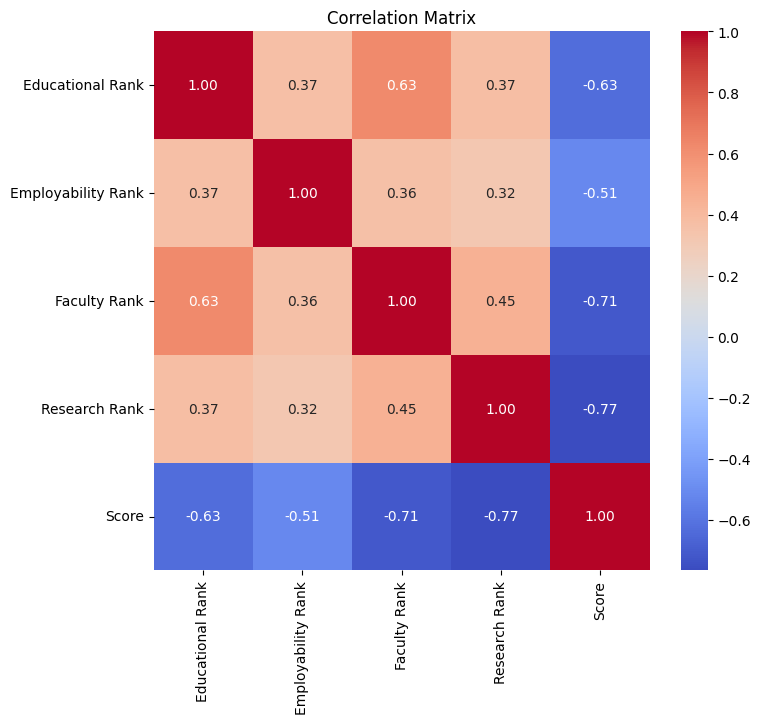

In [134]:
plt.figure(figsize=(8, 7))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show() 

In [135]:
df_WRU.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [137]:
#Delete unrelevent columns ['Educational Rank', 'Employability Rank', 'Faculty Rank']
"""df_WRU.drop(['Educational Rank'],axis=1,inplace=True)
df_WRU.drop(['Employability Rank'],axis=1,inplace=True)
df_WRU.drop(['Faculty Rank'],axis=1,inplace=True)"""


df_WRU_Relevent = df_WRU[['World Rank', 'University Names', 'Location ', 'National Rank', 'Research Rank', 'Score']]

In [138]:
df_WRU_Relevent

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,4,93.3
...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,1922,66.0


In [139]:
df_WRU_Relevent.head()

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,4,93.3


##### 5- **Uniqueness**

In [140]:
df_WRU_Relevent.duplicated().sum()

0

##### 6- **Completeness**

In [141]:
df_WRU_Relevent.isnull().sum().sort_values(ascending = False)


World Rank          0
University Names    0
Location            0
National Rank       0
Research Rank       0
Score               0
dtype: int64

##### 7- **Check Accuracy**

In [142]:
df_WRU_Relevent.head()

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,4,93.3


In [143]:
# check columns types 
df_WRU_Relevent.dtypes

World Rank           object
University Names     object
Location             object
National Rank         int64
Research Rank        object
Score               float64
dtype: object

In [144]:
# Clean the "World Rank" column and convert to int using apply and lambda
df_WRU_Relevent['World Rank'] = df_WRU_Relevent['World Rank'].apply(lambda x: int(x.split('T')[0]))

print(df_WRU_Relevent.dtypes)

World Rank            int64
University Names     object
Location             object
National Rank         int64
Research Rank        object
Score               float64
dtype: object


C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_1544\3836171614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['World Rank'] = df_WRU_Relevent['World Rank'].apply(lambda x: int(x.split('T')[0]))


In [145]:
df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].replace('-', np.nan)


C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_1544\1003247462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].replace('-', np.nan)


In [146]:
df_WRU_Relevent['Research Rank'].isna().sum()

66

In [148]:
df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].apply(lambda x: int(x) if pd.notnull(x) else None)


C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_1544\4216051273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].apply(lambda x: int(x) if pd.notnull(x) else None)


In [149]:
df_WRU_Relevent['Research Rank'].max(), df_WRU_Relevent['Research Rank'].min()

(1996.0, 1.0)

In [150]:
df_WRU_Relevent.dtypes

World Rank            int64
University Names     object
Location             object
National Rank         int64
Research Rank       float64
Score               float64
dtype: object

In [183]:
df_WRU_Relevent.head()

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1,Harvard University,USA,1,1.0,100.0
1,2,Massachusetts Institute of Technology,USA,2,9.0,96.7
2,3,Stanford University,USA,3,2.0,95.2
3,4,University of Cambridge,United Kingdom,1,11.0,94.1
4,5,University of Oxford,United Kingdom,2,4.0,93.3


### Cleaning

In [ ]:
lambda x: int(x.split('-')[0])

In [182]:
df_WRU_Relevent['University Names'] = df_WRU_Relevent['University Names'].apply(lambda x: x.split('\n')[0])

C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_1544\891938687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['University Names'] = df_WRU_Relevent['University Names'].apply(lambda x: x.split('\n')[0])


### Visulaization

# Seconde Data : Times Higher Education

### Data profiling

In [ ]:
df_THE.head()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_WRU[100:120]

,World Rank,University Names,Location,National Rank,Research Rank,Score
100,101,Aarhus University,Denmark,2,87.0,81.8
101,102,National Taiwan University,Taiwan,1,134.0,81.8
102,103,Keio University,Japan,4,397.0,81.7
103,104,University of New South Wales,Australia,3,64.0,81.7
104,105,University of Queensland,Australia,4,47.0,81.6
105,106,University of Groningen,Netherlands,5,81.0,81.6
106,107,KU Leuven,Belgium,1,50.0,81.6
107,108,University of Leeds,United Kingdom,10,139.0,81.5
108,109,University of São Paulo,Brazil,1,78.0,81.5
109,110,University of Geneva,Switzerland,4,132.0,81.4


In [ ]:
df_THE['Rank'].value_counts()

Rank
1001+       591
601–800     205
401–600     199
801–1000    195
301–400     100
           ... 
39            1
2             1
56            1
57            1
55            1
Name: count, Length: 64, dtype: int64

In [ ]:
df_THE.shape

(1591, 20)

In [ ]:
df_THE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [ ]:
df_THE.isnull().sum()

Rank                                 0
University Name                      0
ranking-institution-title href      91
Location                            91
sdg-score-multi__number            724
sdg-score-multi__value             724
sdg-score-multi__number 2          765
sdg-score-multi__value 2           766
sdg-score-multi__number 3          779
sdg-score-multi__value 3           786
sdg-score-multi__value 4             8
scores                               0
sdg-score-multi__number 5         1026
sdg-score-multi__value 5          1034
sdg-score-multi__number 6         1093
sdg-score-multi__value 6          1095
sdg-score-multi__number 7         1152
sdg-score-multi__value 7          1152
sdg-score-multi__number 8         1108
sdg-score-multi__value 8          1108
dtype: int64

# Third Data : shanghai Ranking

### Data profiling

In [151]:
df_SR.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [152]:
df_SR.shape

(1000, 6)

In [153]:
df_SR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [157]:
df_SR['Ranking'].value_counts()

Ranking
901-1000    100
501-600     100
301-400     100
401-500     100
201-300     100
           ... 
29            1
28            1
27            1
26            1
50            1
Name: count, Length: 93, dtype: int64

In [172]:
df_SR['New_rank'] = df_SR['Ranking'].apply(lambda x: int(x.split('-')[0]))


In [178]:
df_SR[105:210]

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail,New_rank
105,101-150,Central South University,9-13,0.0,http://www.shanghairanking.com/_uni/logo/65984...,http://www.shanghairanking.com/institution/cen...,101
106,101-150,Emory University,40-54,0.0,http://www.shanghairanking.com/_uni/logo/74891...,http://www.shanghairanking.com/institution/emo...,101
107,101-150,Icahn School of Medicine at Mount Sinai,40-54,0.0,http://www.shanghairanking.com/_uni/logo-jpg/a...,http://www.shanghairanking.com/institution/ica...,101
108,101-150,Indiana University Bloomington,40-54,9.2,http://www.shanghairanking.com/_uni/logo/7a6b4...,http://www.shanghairanking.com/institution/ind...,101
109,101-150,King Abdulaziz University,1-2,0.0,http://www.shanghairanking.com/_uni/logo-jpg/c...,http://www.shanghairanking.com/institution/kin...,101
...,...,...,...,...,...,...,...
205,201-300,China Medical University (Taichung),1-2,0.0,http://www.shanghairanking.com/_uni/logo/e4e51...,http://www.shanghairanking.com/institution/chi...,201
206,201-300,Chongqing University,27-40,0.0,http://www.shanghairanking.com/_uni/logo/79822...,http://www.shanghairanking.com/institution/cho...,201
207,201-300,Claude Bernard University Lyon 1,9-12,9.2,http://www.shanghairanking.com/_uni/logo/bfcb2...,http://www.shanghairanking.com/institution/cla...,201
208,201-300,Colorado State University,63-85,0.0,http://www.shanghairanking.com/_uni/logo/5890d...,http://www.shanghairanking.com/institution/col...,201
